## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


#Cálculos y códigos para desarrollar el Artículo de difusión 

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns

seaborn.set_context('talk')

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Filtrado de la base de datos en función de las características (idem ejercicio 1)
p1=df["salary_in_usd"]!="Mi sueldo está dolarizado"
p2=df['work_contract_type']=="Full-Time"
df['work_role']=np.where((df.work_role=='Frontend dev Jr ') |
                                   (df.work_role=='back end') |
                                    (df.work_role=='trabajo como desarrollador back, pero también tengo que estar haciendo de analista , DBA, dev frontend y a veces de helpdesk') 
                                    ,'Developer' ,df.work_role)

p3= df["work_role"].isin((['Developer','Software engineer','Analista/desarrollador','Technical Lead Devops']))
df_fil=df[p1 & p2 & p3]

#Eliminación de valores inferiores al percentil 0.10 y superiores al percentil 0.998
df_fil2=df_fil[(df_fil.salary_monthly_NETO > df_fil.salary_monthly_NETO.quantile(0.10)) & (df_fil.salary_monthly_NETO < df_fil.salary_monthly_NETO.quantile(.998))]
df_fil2=df_fil2.loc[df_fil2.profile_years_experience<40]
df_fil2=df_fil2.loc[df_fil2.profile_gender.isin(['Hombre','Mujer'])]
df_fil2=df_fil2.loc[df_fil2.profile_age<60]


In [ ]:
df_fil2['profile_years_experience_cat'] = pd.cut(df_fil2.profile_years_experience, bins=list(range(0,34,5)))

df_fil2['profile_age_cat'] = pd.cut(df_fil2.profile_age, bins=list(range(20,60,5)))




In [ ]:
grouped_experience=df_fil2.groupby(['profile_gender','profile_years_experience_cat']).agg({'salary_monthly_NETO':'mean'}).reset_index()




In [ ]:
grouped_age=df_fil2.groupby(['profile_gender','profile_age_cat']).agg({'salary_monthly_NETO':'mean'}).reset_index()
grouped_age


,profile_gender,profile_age_cat,salary_monthly_NETO
0,Hombre,"(20, 25]",68073.784599
1,Hombre,"(25, 30]",77904.398049
2,Hombre,"(30, 35]",88235.387468
3,Hombre,"(35, 40]",87694.058553
4,Hombre,"(40, 45]",96409.935484
5,Hombre,"(45, 50]",86377.153846
6,Hombre,"(50, 55]",73777.777778
7,Mujer,"(20, 25]",58089.425484
8,Mujer,"(25, 30]",70498.027237
9,Mujer,"(30, 35]",80042.615385


In [ ]:
grouped_experience

,profile_gender,profile_years_experience_cat,salary_monthly_NETO
0,Hombre,"(0, 5]",72561.708288
1,Hombre,"(5, 10]",88763.591226
2,Hombre,"(10, 15]",95431.129870
3,Hombre,"(15, 20]",106523.038462
4,Hombre,"(20, 25]",85070.200000
5,Hombre,"(25, 30]",85700.000000
6,Mujer,"(0, 5]",66510.897714
7,Mujer,"(5, 10]",93614.510204
8,Mujer,"(10, 15]",89934.857143
9,Mujer,"(15, 20]",144000.000000


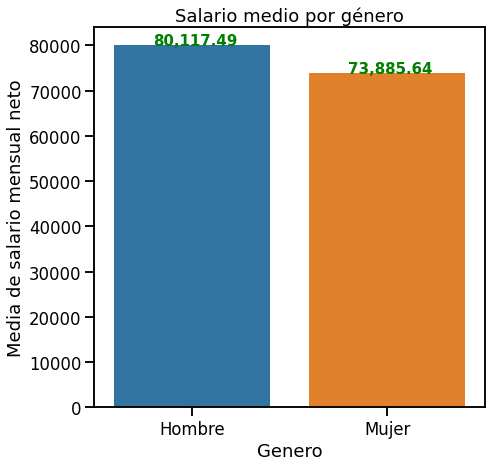

In [ ]:
plt.figure(figsize=(7,7))
ax=sns.barplot(data=df_fil2,x='profile_gender',y='salary_monthly_NETO', estimator=np.mean,ci=None)
plt.ylabel("Media de salario mensual neto")
plt.xlabel("Genero")


plt.title("Salario medio por género")

# plt.yticks(ax.get_yticks()*1/2, ax.get_yticks()*0.5)


for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.6
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,color='g',weight='bold')

plt.show()





In [ ]:
df_fil2[df_fil2.profile_gender=="Hombre"].salary_monthly_NETO.mean()

80117.49069732937

In [ ]:
df_fil2[df_fil2.profile_gender=="Mujer"].salary_monthly_NETO.mean()

73885.64010471205

In [ ]:
hombres=df_fil2[df_fil2.profile_gender=="Hombre"].salary_monthly_NETO
mujeres=df_fil2[df_fil2.profile_gender=="Mujer"].salary_monthly_NETO

In [ ]:
len(hombres)

1348

In [ ]:
len(mujeres)

191

In [ ]:
import scipy.stats as stats

In [ ]:
stats.ttest_ind(hombres, mujeres, equal_var = False)

Ttest_indResult(statistic=2.6685059326354517, pvalue=0.00813612347441327)

In [ ]:
grouped_age

,profile_gender,profile_age_cat,salary_monthly_NETO
0,Hombre,"(20, 25]",68073.784599
1,Hombre,"(25, 30]",77904.398049
2,Hombre,"(30, 35]",88235.387468
3,Hombre,"(35, 40]",87694.058553
4,Hombre,"(40, 45]",96409.935484
5,Hombre,"(45, 50]",86377.153846
6,Hombre,"(50, 55]",73777.777778
7,Mujer,"(20, 25]",58089.425484
8,Mujer,"(25, 30]",70498.027237
9,Mujer,"(30, 35]",80042.615385


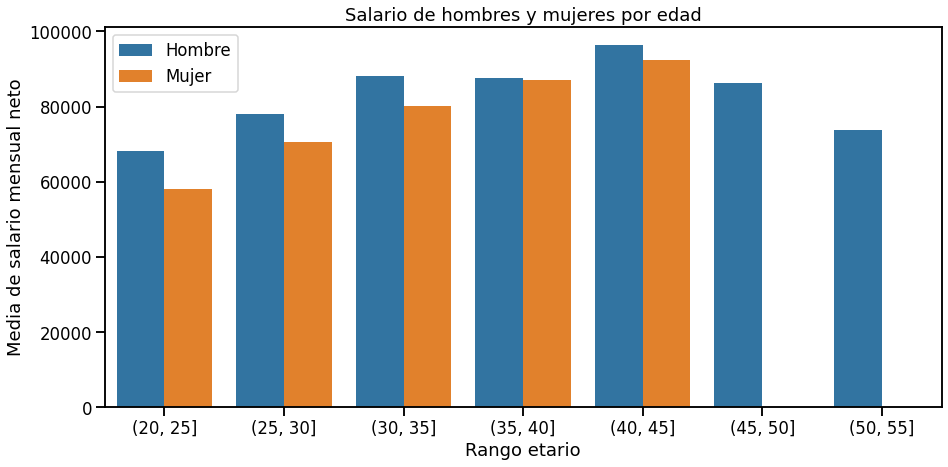

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=grouped_age,x='profile_age_cat',y='salary_monthly_NETO',hue='profile_gender')

plt.title('Salario de hombres y mujeres por edad')
plt.ylabel("Media de salario mensual neto")
plt.xlabel("Rango etario")
plt.legend(loc='best')



plt.show()


plt.show()

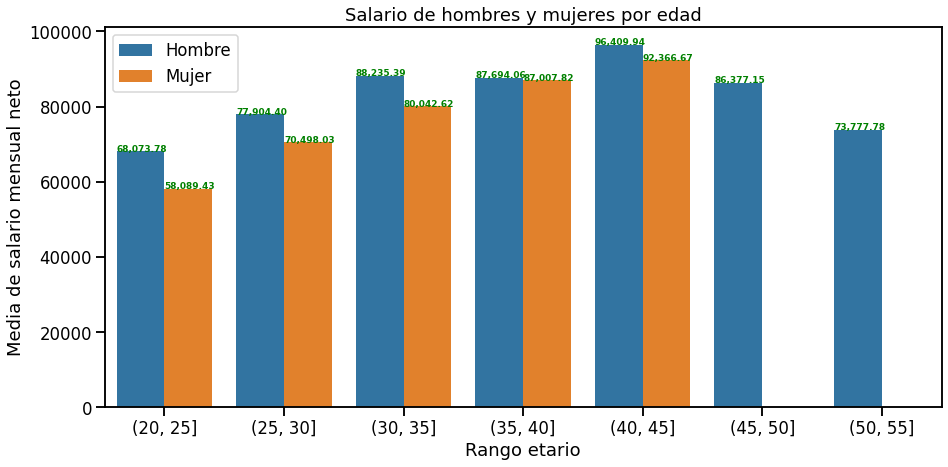

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=grouped_age,x='profile_age_cat',y='salary_monthly_NETO',hue='profile_gender')

plt.title('Salario de hombres y mujeres por edad')
plt.ylabel("Media de salario mensual neto")
plt.xlabel("Rango etario")
plt.legend(loc='best')

for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.4
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=9,color='g',weight='bold')

plt.show()


plt.show()